In [304]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [305]:
#Import the training and the test data into numpy or pandas.
train_data=pd.read_csv('train.txt',delim_whitespace=True,header = None)
train_data

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,10.130094,5913.218107,0.313390,1002.425105,0.419452,0.000002,8.636934e-08,97.938457,78.209471,4.794703,...,4.291121e-10,1723.755452,152.634084,38.404655,269.964468,26128.852218,297.360138,3.872801,3.013179,0.0
1,12.225404,11558.952680,0.371379,985.078452,0.372630,0.000001,5.353037e-08,144.187395,77.978985,13.729071,...,7.780594e-10,2696.170829,22.323880,108.901489,318.944536,5959.940918,218.048871,2.870364,2.597111,0.0
2,19.957186,7939.755939,0.298768,893.294278,0.386106,0.000001,8.024374e-08,94.320478,55.398714,7.237069,...,5.865577e-10,1043.593903,48.596195,70.747980,297.226968,22529.566707,177.685308,2.572584,1.664397,0.0
3,15.687150,6488.539732,0.299834,1029.245199,0.247967,0.000001,9.299997e-08,109.684437,58.587532,7.360908,...,4.482957e-10,2233.608495,17.782914,101.323825,222.340955,26565.110738,226.181825,3.662305,4.033638,0.0
4,20.501789,9243.298906,0.332681,1679.389594,0.373513,0.000001,7.433262e-08,68.249396,60.748423,4.714772,...,5.581910e-10,1652.297098,27.497355,63.226633,175.241610,6002.105594,121.707916,3.627535,4.161598,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1329,19.438514,6922.132016,0.355288,1329.740911,0.314757,0.000002,5.740851e-08,107.832095,99.944535,12.430565,...,4.448750e-10,1749.695756,194.612279,62.997018,261.215773,20350.697708,289.985070,4.252653,3.022945,0.0
1330,17.168782,9272.452912,0.407546,1334.112307,0.363230,0.000001,6.037564e-08,125.593695,58.708405,8.593205,...,3.818621e-10,2232.316110,21.971073,90.528300,209.244233,26449.521156,131.045949,3.148437,3.501025,0.0
1331,17.859040,8657.368505,0.195727,1048.932399,0.343884,0.000003,4.962340e-08,83.416907,72.079502,5.130033,...,4.411122e-10,1350.107134,29.630100,33.399246,230.134220,1898.173289,281.518674,3.790425,1.868188,0.0
1332,16.098196,12638.729093,0.375502,1010.663316,0.405393,0.000001,7.489779e-08,156.419620,89.014148,10.697327,...,4.219062e-10,1433.876128,37.651242,55.490972,215.744054,6740.743996,179.820898,2.758735,4.059397,0.0


In [306]:
train_data.shape

(1334, 49)

In [307]:
train_data

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,10.130094,5913.218107,0.313390,1002.425105,0.419452,0.000002,8.636934e-08,97.938457,78.209471,4.794703,...,4.291121e-10,1723.755452,152.634084,38.404655,269.964468,26128.852218,297.360138,3.872801,3.013179,0.0
1,12.225404,11558.952680,0.371379,985.078452,0.372630,0.000001,5.353037e-08,144.187395,77.978985,13.729071,...,7.780594e-10,2696.170829,22.323880,108.901489,318.944536,5959.940918,218.048871,2.870364,2.597111,0.0
2,19.957186,7939.755939,0.298768,893.294278,0.386106,0.000001,8.024374e-08,94.320478,55.398714,7.237069,...,5.865577e-10,1043.593903,48.596195,70.747980,297.226968,22529.566707,177.685308,2.572584,1.664397,0.0
3,15.687150,6488.539732,0.299834,1029.245199,0.247967,0.000001,9.299997e-08,109.684437,58.587532,7.360908,...,4.482957e-10,2233.608495,17.782914,101.323825,222.340955,26565.110738,226.181825,3.662305,4.033638,0.0
4,20.501789,9243.298906,0.332681,1679.389594,0.373513,0.000001,7.433262e-08,68.249396,60.748423,4.714772,...,5.581910e-10,1652.297098,27.497355,63.226633,175.241610,6002.105594,121.707916,3.627535,4.161598,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1329,19.438514,6922.132016,0.355288,1329.740911,0.314757,0.000002,5.740851e-08,107.832095,99.944535,12.430565,...,4.448750e-10,1749.695756,194.612279,62.997018,261.215773,20350.697708,289.985070,4.252653,3.022945,0.0
1330,17.168782,9272.452912,0.407546,1334.112307,0.363230,0.000001,6.037564e-08,125.593695,58.708405,8.593205,...,3.818621e-10,2232.316110,21.971073,90.528300,209.244233,26449.521156,131.045949,3.148437,3.501025,0.0
1331,17.859040,8657.368505,0.195727,1048.932399,0.343884,0.000003,4.962340e-08,83.416907,72.079502,5.130033,...,4.411122e-10,1350.107134,29.630100,33.399246,230.134220,1898.173289,281.518674,3.790425,1.868188,0.0
1332,16.098196,12638.729093,0.375502,1010.663316,0.405393,0.000001,7.489779e-08,156.419620,89.014148,10.697327,...,4.219062e-10,1433.876128,37.651242,55.490972,215.744054,6740.743996,179.820898,2.758735,4.059397,0.0


In [308]:
y=train_data[48] #extracting last column as target features(dependent feature)
y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1329    0.0
1330    0.0
1331    0.0
1332    0.0
1333    0.0
Name: 48, Length: 1334, dtype: float64

In [309]:
np.unique(y) #it is classification problem two class 0 &1

array([0., 1.])

In [310]:
x=train_data.drop(48,axis=1) #extracting all column expect target column as independent feauture
x

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,10.130094,5913.218107,0.313390,1002.425105,0.419452,0.000002,8.636934e-08,97.938457,78.209471,4.794703,...,1041.098611,4.291121e-10,1723.755452,152.634084,38.404655,269.964468,26128.852218,297.360138,3.872801,3.013179
1,12.225404,11558.952680,0.371379,985.078452,0.372630,0.000001,5.353037e-08,144.187395,77.978985,13.729071,...,885.752691,7.780594e-10,2696.170829,22.323880,108.901489,318.944536,5959.940918,218.048871,2.870364,2.597111
2,19.957186,7939.755939,0.298768,893.294278,0.386106,0.000001,8.024374e-08,94.320478,55.398714,7.237069,...,858.021250,5.865577e-10,1043.593903,48.596195,70.747980,297.226968,22529.566707,177.685308,2.572584,1.664397
3,15.687150,6488.539732,0.299834,1029.245199,0.247967,0.000001,9.299997e-08,109.684437,58.587532,7.360908,...,856.913316,4.482957e-10,2233.608495,17.782914,101.323825,222.340955,26565.110738,226.181825,3.662305,4.033638
4,20.501789,9243.298906,0.332681,1679.389594,0.373513,0.000001,7.433262e-08,68.249396,60.748423,4.714772,...,805.447733,5.581910e-10,1652.297098,27.497355,63.226633,175.241610,6002.105594,121.707916,3.627535,4.161598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1329,19.438514,6922.132016,0.355288,1329.740911,0.314757,0.000002,5.740851e-08,107.832095,99.944535,12.430565,...,1147.524287,4.448750e-10,1749.695756,194.612279,62.997018,261.215773,20350.697708,289.985070,4.252653,3.022945
1330,17.168782,9272.452912,0.407546,1334.112307,0.363230,0.000001,6.037564e-08,125.593695,58.708405,8.593205,...,1027.362502,3.818621e-10,2232.316110,21.971073,90.528300,209.244233,26449.521156,131.045949,3.148437,3.501025
1331,17.859040,8657.368505,0.195727,1048.932399,0.343884,0.000003,4.962340e-08,83.416907,72.079502,5.130033,...,756.750812,4.411122e-10,1350.107134,29.630100,33.399246,230.134220,1898.173289,281.518674,3.790425,1.868188
1332,16.098196,12638.729093,0.375502,1010.663316,0.405393,0.000001,7.489779e-08,156.419620,89.014148,10.697327,...,1148.468171,4.219062e-10,1433.876128,37.651242,55.490972,215.744054,6740.743996,179.820898,2.758735,4.059397


In [311]:
x.shape,y.shape

((1334, 48), (1334,))

In [312]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1334 entries, 0 to 1333
Data columns (total 48 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1334 non-null   float64
 1   1       1334 non-null   float64
 2   2       1334 non-null   float64
 3   3       1334 non-null   float64
 4   4       1334 non-null   float64
 5   5       1334 non-null   float64
 6   6       1334 non-null   float64
 7   7       1334 non-null   float64
 8   8       1334 non-null   float64
 9   9       1334 non-null   float64
 10  10      1334 non-null   float64
 11  11      1334 non-null   float64
 12  12      1334 non-null   float64
 13  13      1334 non-null   float64
 14  14      1334 non-null   float64
 15  15      1334 non-null   float64
 16  16      1334 non-null   float64
 17  17      1334 non-null   float64
 18  18      1334 non-null   float64
 19  19      1334 non-null   float64
 20  20      1334 non-null   float64
 21  21      1334 non-null   float64
 22  

In [313]:
x.iloc[1:3,8:38] #checking how missing value displayed in dataset colimn 37 and row 1 has missing value

,8,9,10,11,12,13,14,15,16,17,...,28,29,30,31,32,33,34,35,36,37
1,77.978985,13.729071,0.003468,0.427939,10376.366745,9.936936,1.869554,14863.700148,1620.851743,1340.697921,...,0.120667,112.814035,15.356474,37.994364,16.743492,275.239689,0.266786,850.126428,0.080480,-12345.000000
2,55.398714,7.237069,0.003492,0.299731,9979.706366,5.146379,2.813149,7003.952452,1579.395418,1124.652268,...,0.222167,202.078358,20.795376,55.882456,17.903136,138.058485,0.293496,898.654080,0.089788,697.526314


In [314]:
train_data.dtypes #checking datatype of column

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41    float64
42    float64
43    float64
44    float64
45    float64
46    float64
47    float64
48    float64
dtype: object

In [315]:
arr = np.where(np.isclose(train_data.values, -12345.000000), np.nan, train_data.values)
train_data = pd.DataFrame(arr, index=train_data.index, columns=train_data.columns)
train_data

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,10.130094,5913.218107,0.313390,1002.425105,0.419452,0.000002,8.636934e-08,97.938457,78.209471,4.794703,...,4.291121e-10,1723.755452,152.634084,38.404655,269.964468,26128.852218,297.360138,3.872801,3.013179,0.0
1,12.225404,11558.952680,0.371379,985.078452,0.372630,0.000001,5.353037e-08,144.187395,77.978985,13.729071,...,7.780594e-10,2696.170829,22.323880,108.901489,318.944536,5959.940918,218.048871,2.870364,2.597111,0.0
2,19.957186,7939.755939,0.298768,893.294278,0.386106,0.000001,8.024374e-08,94.320478,55.398714,7.237069,...,5.865577e-10,1043.593903,48.596195,70.747980,297.226968,22529.566707,177.685308,2.572584,1.664397,0.0
3,15.687150,6488.539732,0.299834,1029.245199,0.247967,0.000001,9.299997e-08,109.684437,58.587532,7.360908,...,4.482957e-10,2233.608495,17.782914,101.323825,222.340955,26565.110738,226.181825,3.662305,4.033638,0.0
4,20.501789,9243.298906,0.332681,1679.389594,0.373513,0.000001,7.433262e-08,68.249396,60.748423,4.714772,...,5.581910e-10,1652.297098,27.497355,63.226633,175.241610,6002.105594,121.707916,3.627535,4.161598,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1329,19.438514,6922.132016,0.355288,1329.740911,0.314757,0.000002,5.740851e-08,107.832095,99.944535,12.430565,...,4.448750e-10,1749.695756,194.612279,62.997018,261.215773,20350.697708,289.985070,4.252653,3.022945,0.0
1330,17.168782,9272.452912,0.407546,1334.112307,0.363230,0.000001,6.037564e-08,125.593695,58.708405,8.593205,...,3.818621e-10,2232.316110,21.971073,90.528300,209.244233,26449.521156,131.045949,3.148437,3.501025,0.0
1331,17.859040,8657.368505,0.195727,1048.932399,0.343884,0.000003,4.962340e-08,83.416907,72.079502,5.130033,...,4.411122e-10,1350.107134,29.630100,33.399246,230.134220,1898.173289,281.518674,3.790425,1.868188,0.0
1332,16.098196,12638.729093,0.375502,1010.663316,0.405393,0.000001,7.489779e-08,156.419620,89.014148,10.697327,...,4.219062e-10,1433.876128,37.651242,55.490972,215.744054,6740.743996,179.820898,2.758735,4.059397,0.0


In [316]:
train_data.isna().sum() #checking column that contain nan

0     17
1      8
2     15
3      9
4     15
5     16
6     12
7     20
8     14
9     14
10    17
11     9
12    16
13    14
14     9
15     8
16    13
17    11
18    14
19    17
20    11
21    14
22    12
23    15
24    12
25    14
26    16
27    16
28    10
29    19
30    14
31    14
32     9
33     7
34     8
35    14
36    15
37    18
38    14
39    15
40    12
41    15
42    10
43    11
44     8
45    19
46     9
47    18
48     0
dtype: int64

In [317]:
train_data.iloc[1:3,8:38] #checking if nan applied

,8,9,10,11,12,13,14,15,16,17,...,28,29,30,31,32,33,34,35,36,37
1,77.978985,13.729071,0.003468,0.427939,10376.366745,9.936936,1.869554,14863.700148,1620.851743,1340.697921,...,0.120667,112.814035,15.356474,37.994364,16.743492,275.239689,0.266786,850.126428,0.080480,NaN
2,55.398714,7.237069,0.003492,0.299731,9979.706366,5.146379,2.813149,7003.952452,1579.395418,1124.652268,...,0.222167,202.078358,20.795376,55.882456,17.903136,138.058485,0.293496,898.654080,0.089788,697.526314


In [318]:
mean=train_data.mean()
mean

0     1.714393e+01
1     8.915733e+03
2     3.418586e-01
3     1.419285e+03
4     3.716855e-01
5     1.805343e-06
6     6.969102e-08
7     9.857138e+01
8     6.345357e+01
9     7.943712e+00
10    3.385901e-03
11    4.032707e-01
12    1.065735e+04
13    8.340374e+00
14    2.120837e+00
15    1.267499e+04
16    1.525647e+03
17    1.225039e+03
18    1.620814e+01
19    1.011007e+03
20    1.409761e-04
21    2.516699e-03
22    3.629334e-06
23    2.546312e+03
24    7.789762e+03
25    2.586115e+03
26    4.928806e+02
27    2.773948e+03
28    2.461414e-01
29    1.639160e+02
30    1.417432e+01
31    4.283537e+01
32    2.256395e+01
33    2.004123e+02
34    3.557311e-01
35    8.274183e+02
36    9.379192e-02
37    1.205938e+03
38    8.466599e+02
39    4.699724e-10
40    1.640869e+03
41    9.310230e+01
42    7.361642e+01
43    2.497791e+02
44    1.954046e+04
45    2.400535e+02
46    3.887442e+00
47    3.285768e+00
48    2.436282e-01
dtype: float64

In [319]:
train_data.fillna(train_data.mean(),inplace=True)

In [320]:
train_data.iloc[1:3,8:38] #checking if mean applied for each column 37

,8,9,10,11,12,13,14,15,16,17,...,28,29,30,31,32,33,34,35,36,37
1,77.978985,13.729071,0.003468,0.427939,10376.366745,9.936936,1.869554,14863.700148,1620.851743,1340.697921,...,0.120667,112.814035,15.356474,37.994364,16.743492,275.239689,0.266786,850.126428,0.080480,1205.937605
2,55.398714,7.237069,0.003492,0.299731,9979.706366,5.146379,2.813149,7003.952452,1579.395418,1124.652268,...,0.222167,202.078358,20.795376,55.882456,17.903136,138.058485,0.293496,898.654080,0.089788,697.526314


In [321]:
train_data.isna().sum() #checking column is successfully replaced with mean value since all are numeric feature not categorical

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
dtype: int64

In [322]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1334 entries, 0 to 1333
Data columns (total 49 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1334 non-null   float64
 1   1       1334 non-null   float64
 2   2       1334 non-null   float64
 3   3       1334 non-null   float64
 4   4       1334 non-null   float64
 5   5       1334 non-null   float64
 6   6       1334 non-null   float64
 7   7       1334 non-null   float64
 8   8       1334 non-null   float64
 9   9       1334 non-null   float64
 10  10      1334 non-null   float64
 11  11      1334 non-null   float64
 12  12      1334 non-null   float64
 13  13      1334 non-null   float64
 14  14      1334 non-null   float64
 15  15      1334 non-null   float64
 16  16      1334 non-null   float64
 17  17      1334 non-null   float64
 18  18      1334 non-null   float64
 19  19      1334 non-null   float64
 20  20      1334 non-null   float64
 21  21      1334 non-null   float64
 22  

In [323]:
y=train_data[48] #extracting last column as target features(dependent feature)
y
np.unique(y)

array([0., 1.])

In [324]:
x=train_data.drop(48,axis=1) #extracting all column expect target column as independent feauture
x

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,10.130094,5913.218107,0.313390,1002.425105,0.419452,0.000002,8.636934e-08,97.938457,78.209471,4.794703,...,1041.098611,4.291121e-10,1723.755452,152.634084,38.404655,269.964468,26128.852218,297.360138,3.872801,3.013179
1,12.225404,11558.952680,0.371379,985.078452,0.372630,0.000001,5.353037e-08,144.187395,77.978985,13.729071,...,885.752691,7.780594e-10,2696.170829,22.323880,108.901489,318.944536,5959.940918,218.048871,2.870364,2.597111
2,19.957186,7939.755939,0.298768,893.294278,0.386106,0.000001,8.024374e-08,94.320478,55.398714,7.237069,...,858.021250,5.865577e-10,1043.593903,48.596195,70.747980,297.226968,22529.566707,177.685308,2.572584,1.664397
3,15.687150,6488.539732,0.299834,1029.245199,0.247967,0.000001,9.299997e-08,109.684437,58.587532,7.360908,...,856.913316,4.482957e-10,2233.608495,17.782914,101.323825,222.340955,26565.110738,226.181825,3.662305,4.033638
4,20.501789,9243.298906,0.332681,1679.389594,0.373513,0.000001,7.433262e-08,68.249396,60.748423,4.714772,...,805.447733,5.581910e-10,1652.297098,27.497355,63.226633,175.241610,6002.105594,121.707916,3.627535,4.161598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1329,19.438514,6922.132016,0.355288,1329.740911,0.314757,0.000002,5.740851e-08,107.832095,99.944535,12.430565,...,1147.524287,4.448750e-10,1749.695756,194.612279,62.997018,261.215773,20350.697708,289.985070,4.252653,3.022945
1330,17.168782,9272.452912,0.407546,1334.112307,0.363230,0.000001,6.037564e-08,125.593695,58.708405,8.593205,...,1027.362502,3.818621e-10,2232.316110,21.971073,90.528300,209.244233,26449.521156,131.045949,3.148437,3.501025
1331,17.859040,8657.368505,0.195727,1048.932399,0.343884,0.000003,4.962340e-08,83.416907,72.079502,5.130033,...,756.750812,4.411122e-10,1350.107134,29.630100,33.399246,230.134220,1898.173289,281.518674,3.790425,1.868188
1332,16.098196,12638.729093,0.375502,1010.663316,0.405393,0.000001,7.489779e-08,156.419620,89.014148,10.697327,...,1148.468171,4.219062e-10,1433.876128,37.651242,55.490972,215.744054,6740.743996,179.820898,2.758735,4.059397


In [325]:
x.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
dtype: int64

In [326]:
correlation=train_data.corr()[48]
correlation

0    -0.026865
1    -0.012603
2     0.012828
3     0.030898
4     0.019905
5    -0.073856
6     0.012510
7    -0.018917
8     0.038972
9    -0.055097
10   -0.643073
11    0.023117
12   -0.019574
13    0.017222
14    0.024241
15    0.245946
16   -0.012868
17   -0.020187
18    0.001504
19    0.035547
20   -0.017606
21    0.018061
22    0.004302
23   -0.003298
24   -0.013220
25   -0.009984
26    0.012832
27   -0.019347
28    0.009611
29   -0.028381
30    0.003988
31    0.001510
32    0.018171
33    0.048928
34    0.017671
35   -0.002964
36   -0.033551
37    0.040045
38    0.004384
39    0.014710
40    0.033560
41    0.250070
42    0.002697
43   -0.035488
44    0.026045
45   -0.038802
46    0.003499
47   -0.007855
48    1.000000
Name: 48, dtype: float64

In [327]:
sorted_features=correlation.abs().sort_values(ascending=False)
sorted_features.head(10)

48    1.000000
10    0.643073
41    0.250070
15    0.245946
5     0.073856
9     0.055097
33    0.048928
37    0.040045
8     0.038972
45    0.038802
Name: 48, dtype: float64

# above are 10 important feature in dataset

In [328]:
from sklearn.feature_selection import SelectKBest,f_classif
k_best=SelectKBest(score_func=f_classif,k=2)

X_new=k_best.fit_transform(x,y)
selected_indices=k_best.get_support(indices=True)
selected_features= train_data.columns[selected_indices]
selected_features

Index([10, 41], dtype='int64')

# 10,41 column are best features

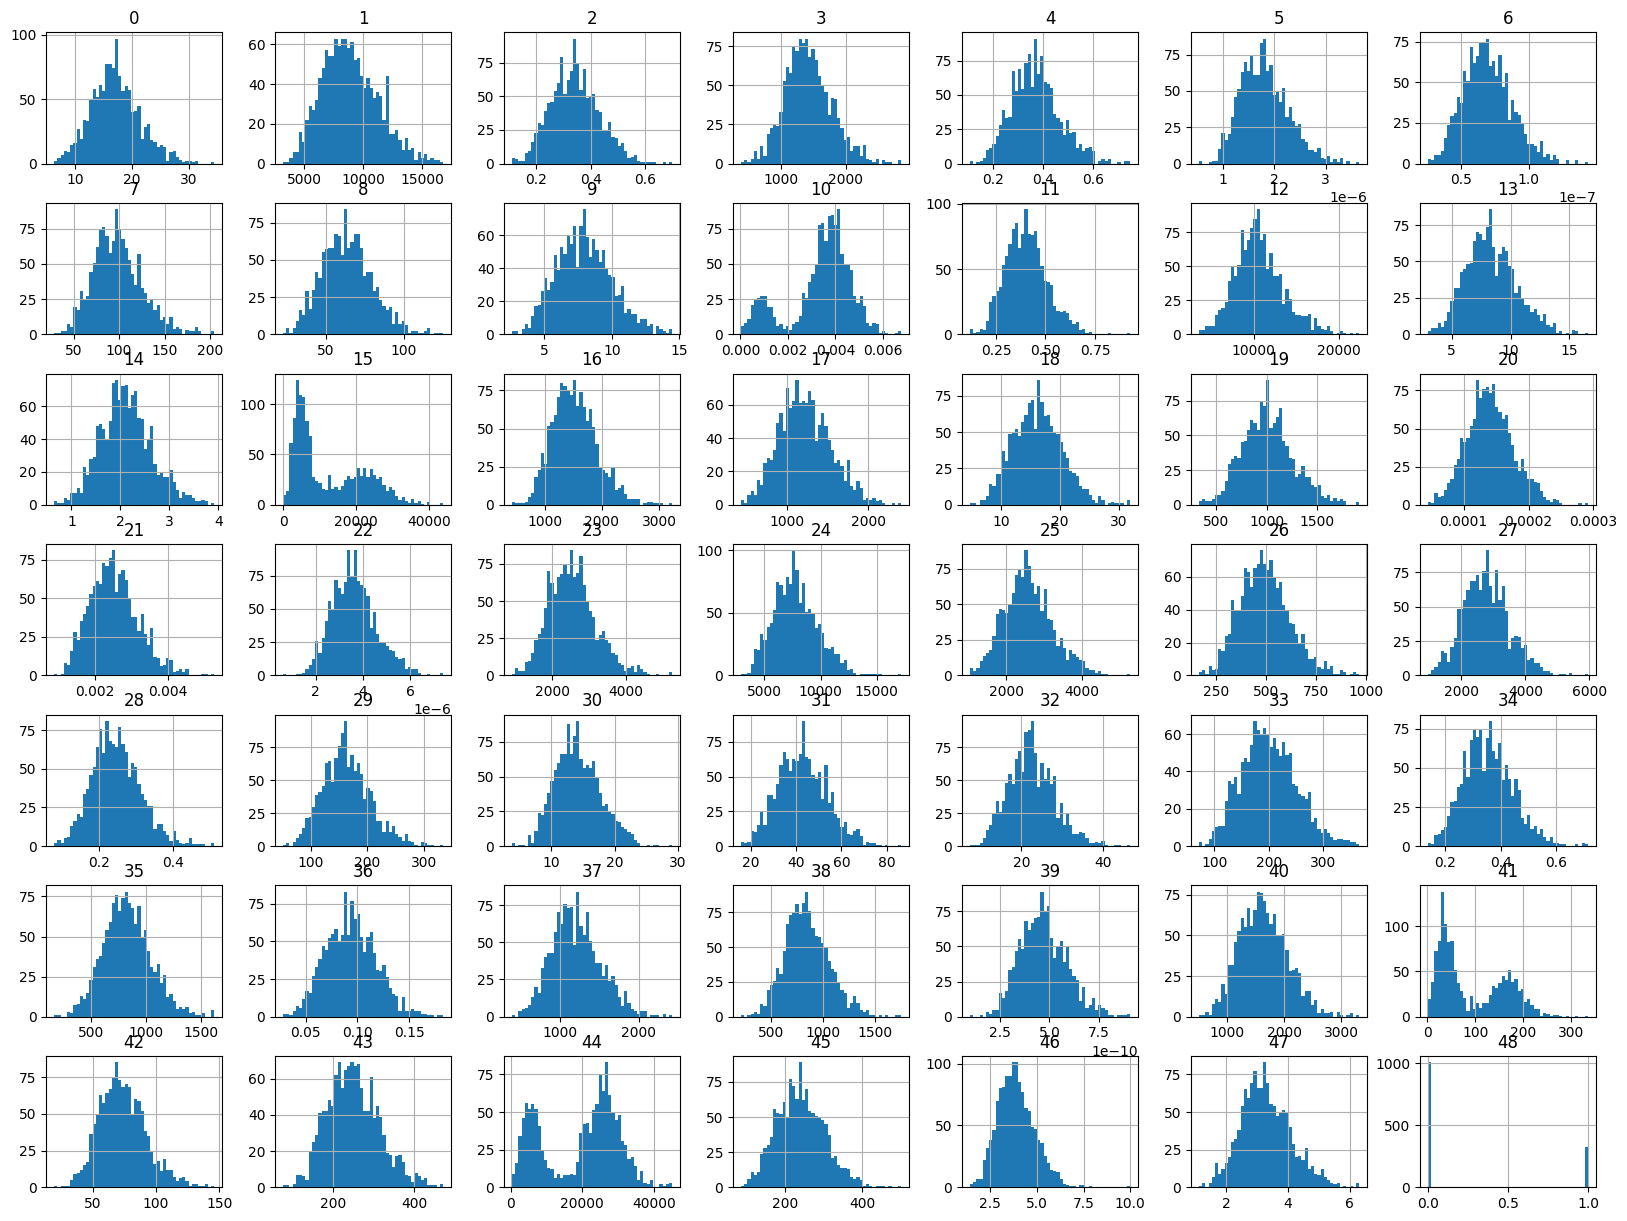

In [329]:
train_data.hist(bins=50, figsize=(20,15)) #trying to fit dataset in bin (20640%50=412 data in one bar)
plt.show()

# All the column value follow a normal distribution.for first column [0] value lies between 13 and 22

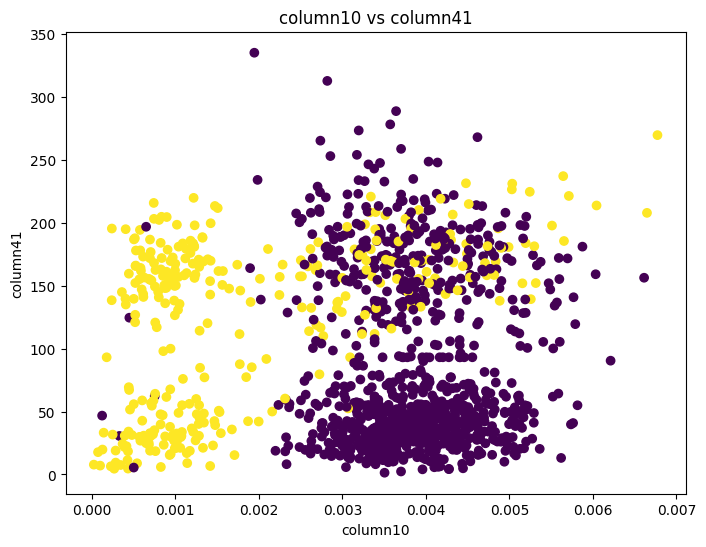

In [330]:
plt.figure(figsize=(8, 6))
plt.scatter(train_data.iloc[:, 10], train_data.iloc[:, 41], c=y)
plt.xlabel('column10')
plt.ylabel('column41')
plt.title('column10 vs column41')
plt.show()
#class can be seperatable 

In [331]:
# Scale our data using StandardScaler:
standardscaler = StandardScaler()
x= standardscaler.fit_transform(x)

In [332]:
x1=pd.DataFrame(x) #converting into dataframe to compute correlation again
df = pd.concat([x1, y], axis=1)
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,-1.635731,-1.267656,-0.321630,-1.146670,0.494692,1.054973,0.925483,-0.023759,0.910802,-1.541173,...,-0.346178,0.196361,0.867632,-1.897361,0.316638,0.628734,0.932112,-0.014664,-0.334759,0.0
1,-1.147073,1.115962,0.333514,-1.194386,0.009787,-0.744073,-0.896757,1.712357,0.896575,2.831442,...,2.610186,2.500037,-1.031543,1.901311,1.084965,-1.295996,-0.357913,-1.018689,-0.845724,0.0
2,0.656092,-0.412056,-0.486824,-1.446860,0.149341,-0.914916,0.585572,-0.159573,-0.497183,-0.345842,...,0.987738,-1.414959,-0.648644,-0.154564,0.744292,0.285252,-1.014440,-1.316940,-1.991169,0.0


In [333]:
correlation=df.corr()[48]
correlation

0    -0.026865
1    -0.012603
2     0.012828
3     0.030898
4     0.019905
5    -0.073856
6     0.012510
7    -0.018917
8     0.038972
9    -0.055097
10   -0.643073
11    0.023117
12   -0.019574
13    0.017222
14    0.024241
15    0.245946
16   -0.012868
17   -0.020187
18    0.001504
19    0.035547
20   -0.017606
21    0.018061
22    0.004302
23   -0.003298
24   -0.013220
25   -0.009984
26    0.012832
27   -0.019347
28    0.009611
29   -0.028381
30    0.003988
31    0.001510
32    0.018171
33    0.048928
34    0.017671
35   -0.002964
36   -0.033551
37    0.040045
38    0.004384
39    0.014710
40    0.033560
41    0.250070
42    0.002697
43   -0.035488
44    0.026045
45   -0.038802
46    0.003499
47   -0.007855
48    1.000000
Name: 48, dtype: float64

In [334]:
sorted_features=correlation.abs().sort_values(ascending=False)
sorted_features.head(10) #correlation value after scaling

48    1.000000
10    0.643073
41    0.250070
15    0.245946
5     0.073856
9     0.055097
33    0.048928
37    0.040045
8     0.038972
45    0.038802
Name: 48, dtype: float64

# correlation value before scaling
48    1.000000
10    0.643073
41    0.250070
15    0.245946
5     0.073856
9     0.055097
33    0.048928
37    0.040045
8     0.038972
45    0.038802

# Correlation value did not change after scaling

In [335]:
df.describe() #scaled value

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
count,1.334000e+03,1.334000e+03,1.334000e+03,1.334000e+03,1.334000e+03,1.334000e+03,1.334000e+03,1.334000e+03,1.334000e+03,1.334000e+03,...,1.334000e+03,1.334000e+03,1.334000e+03,1.334000e+03,1.334000e+03,1.334000e+03,1.334000e+03,1.334000e+03,1.334000e+03,1334.000000
mean,5.299775e-16,1.065281e-17,2.743100e-16,-1.997403e-16,-2.869602e-16,-3.728485e-16,-3.062684e-17,-2.130563e-17,1.757714e-16,1.331602e-16,...,-2.623256e-16,2.769732e-16,4.793767e-17,-6.671325e-16,3.835013e-16,-6.258529e-17,1.810978e-16,-5.379671e-16,4.767135e-16,0.243628
std,1.000375e+00,1.000375e+00,1.000375e+00,1.000375e+00,1.000375e+00,1.000375e+00,1.000375e+00,1.000375e+00,1.000375e+00,1.000375e+00,...,1.000375e+00,1.000375e+00,1.000375e+00,1.000375e+00,1.000375e+00,1.000375e+00,1.000375e+00,1.000375e+00,1.000375e+00,0.429432
min,-2.516501e+00,-2.408634e+00,-2.616887e+00,-2.864972e+00,-2.709489e+00,-2.750264e+00,-2.463400e+00,-2.624771e+00,-2.541397e+00,-2.600525e+00,...,-3.155401e+00,-2.687112e+00,-1.336422e+00,-2.916697e+00,-2.712423e+00,-1.830257e+00,-2.511861e+00,-2.485463e+00,-2.664322e+00,0.000000
25%,-6.783270e-01,-7.292860e-01,-6.899429e-01,-6.684963e-01,-6.992938e-01,-7.413129e-01,-6.927792e-01,-6.976931e-01,-7.129532e-01,-7.190080e-01,...,-7.075597e-01,-7.224193e-01,-8.647483e-01,-6.965639e-01,-6.991638e-01,-1.133351e+00,-7.149560e-01,-7.101077e-01,-7.025399e-01,0.000000
50%,-4.055207e-02,-1.099794e-01,-3.576819e-02,-6.284040e-02,-4.346645e-02,-8.185576e-02,-7.435211e-02,-6.767897e-02,-3.240600e-02,-3.796999e-02,...,-6.195216e-02,-5.875560e-02,-4.791952e-01,-9.258686e-02,-5.993525e-02,3.228389e-01,-3.202890e-02,-7.953029e-02,-6.714219e-02,0.000000
75%,5.950442e-01,6.565648e-01,6.384768e-01,6.048372e-01,5.871287e-01,6.278007e-01,6.113145e-01,6.082267e-01,6.110381e-01,6.619786e-01,...,6.557760e-01,6.491000e-01,9.519883e-01,6.282490e-01,6.638919e-01,7.521655e-01,6.762174e-01,6.160123e-01,6.438655e-01,0.000000
max,4.046984e+00,3.312577e+00,4.041588e+00,3.970707e+00,3.885998e+00,3.968327e+00,4.122004e+00,3.975110e+00,3.824545e+00,3.192249e+00,...,3.718942e+00,3.958542e+00,3.525606e+00,3.894050e+00,3.468348e+00,2.444836e+00,4.233828e+00,6.124516e+00,3.699066e+00,1.000000


In [336]:
#removing outlier (noise in data)
import scipy.stats as stats
import numpy as np
z_scores = np.abs(stats.zscore(df))
threshold =3
print("size before removing outliers:",df.shape)
outliers_df = df[(z_scores > threshold).any(axis=1)]
df=df[(z_scores <= threshold).all(axis=1)]
print("size before removing outliers:",df.shape)

size before removing outliers: (1334, 49)
size before removing outliers: (1083, 49)


#choosing 5 features from best column in dataset
10    0.643073
41    0.250070
15    0.245946
5     0.073856
9     0.055097
33    0.048928
37    0.040045
8     0.038972
45    0.038802

In [337]:
x=pd.DataFrame(x)
indices_to_extract = [10, 41, 15, 5, 9]
selected_rows = x.loc[:, x.columns.intersection(indices_to_extract)]
selected_rows.shape

(1334, 5)

In [338]:
y.shape

(1334,)

In [339]:
# Split our data between a training set and a test set:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.30,
                                                    stratify=y, random_state=66)

In [340]:
x_train.shape,x_test.shape

((933, 48), (401, 48))

In [341]:
models=[]
models.append(('LogisticRegression',LogisticRegression()))
models.append(('Naive Bayes',GaussianNB()))
models.append(('KNN',KNeighborsClassifier(n_neighbors=5)))
models.append(('RandomForestClassifier',RandomForestClassifier(n_estimators=100, random_state=29)))
models.append(('DecisionTreeClassifier',DecisionTreeClassifier(max_depth=5, random_state=29)))
models.append(('SVM',SVC(kernel='linear', random_state=29)))

models

[('LogisticRegression', LogisticRegression()),
 ('Naive Bayes', GaussianNB()),
 ('KNN', KNeighborsClassifier()),
 ('RandomForestClassifier', RandomForestClassifier(random_state=29)),
 ('DecisionTreeClassifier',
  DecisionTreeClassifier(max_depth=5, random_state=29)),
 ('SVM', SVC(kernel='linear', random_state=29))]

In [342]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

In [343]:
for name,model in models:
    print(name,model)
    print()
    model.fit(x_train, y_train)
# Make predictions on the test data
    y_pred = model.predict(x_test)
    
    print("confusion matrix",confusion_matrix(y_test,y_pred))   
    print('\n') 
    print("accuracy",accuracy_score(y_test,y_pred)) 
    print('\n')   
    print("precision",precision_score(y_test,y_pred))
    print('\n') 
    print("recall",recall_score(y_test,y_pred))
    print('\n') 
    print("f1score",f1_score(y_test,y_pred))
    auc=sklearn.metrics.roc_auc_score(y_test,y_pred)
    print("auc",auc)
    print('--------------------------------------------------------') 

LogisticRegression LogisticRegression()

confusion matrix [[293  10]
 [ 23  75]]


accuracy 0.9177057356608479


precision 0.8823529411764706


recall 0.7653061224489796


f1score 0.8196721311475409
auc 0.8661514110594734
--------------------------------------------------------
Naive Bayes GaussianNB()

confusion matrix [[295   8]
 [ 36  62]]


accuracy 0.8902743142144638


precision 0.8857142857142857


recall 0.6326530612244898


f1score 0.7380952380952381
auc 0.8031252104802318
--------------------------------------------------------
KNN KNeighborsClassifier()

confusion matrix [[298   5]
 [ 65  33]]


accuracy 0.8254364089775561


precision 0.868421052631579


recall 0.336734693877551


f1score 0.48529411764705876
auc 0.6601165218562673
--------------------------------------------------------
RandomForestClassifier RandomForestClassifier(random_state=29)

confusion matrix [[299   4]
 [  5  93]]


accuracy 0.9775561097256857


precision 0.9587628865979382


recall 0.9489795918367347

# DecisionTreeClassifier has high auc 0.9578365999865294 95% i am choosing as best model

In [344]:
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier(max_depth=5, random_state=29)
# Train the classifier on the training data
dtc.fit(x_train, y_train)

# Predict on the val data
y_pred = dtc.predict(x_test)


In [345]:
    print("confusion matrix",confusion_matrix(y_test,y_pred))   
    print('\n') 
    print("accuracy",accuracy_score(y_test,y_pred)) 
    print('\n')   
    print("precision",precision_score(y_test,y_pred))
    print('\n') 
    print("recall",recall_score(y_test,y_pred))
    print('\n') 
    print("f1score",f1_score(y_test,y_pred))
    auc=sklearn.metrics.roc_auc_score(y_test,y_pred)
    print("auc",auc)
    print('--------------------------------------------------------') 

confusion matrix [[296   7]
 [  6  92]]


accuracy 0.9675810473815462


precision 0.9292929292929293


recall 0.9387755102040817


f1score 0.934010152284264
auc 0.9578365999865294
--------------------------------------------------------


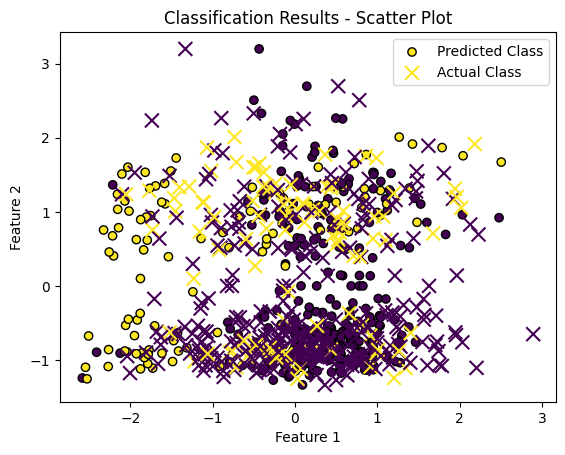

In [346]:
# Visualize the classification in a scatter plot
plt.scatter(x_test[10], x_test[41], c=y_pred, cmap='viridis', edgecolors='k', marker='o', label='Predicted Class')
plt.scatter(x_test[40], x_test[41], c=y_test, cmap='viridis', marker='x', s=100, label='Actual Class')
plt.title('Classification Results - Scatter Plot')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [347]:
######bring test data and predict my model
test_data=pd.read_csv('test.txt',delim_whitespace=True,header = None)
test_data

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,16.916023,8818.954765,0.206767,1232.659056,0.318406,0.000002,7.350117e-08,74.612324,99.970369,6.168756,...,1143.765655,5.085620e-10,1333.230656,25.802968,40.588444,214.444486,26762.969717,183.343902,6.305796,3.240201
1,18.238750,10397.065168,0.387128,1400.495635,0.673812,0.000002,1.309528e-07,107.016223,89.469716,12.649202,...,781.483897,3.202068e-10,1159.533839,205.467810,75.929685,245.007435,33428.688787,340.956773,4.749377,4.008246
2,20.006084,9806.411737,0.468814,991.551620,0.316165,0.000002,6.940150e-08,111.961541,38.057564,10.439868,...,711.960201,5.235126e-10,1707.109561,168.515574,61.688172,187.173890,28744.918266,196.528199,3.815054,1.989017
3,23.021031,6791.390456,0.241677,974.497560,0.437900,0.000001,5.434640e-08,126.729564,48.539825,8.960092,...,961.089793,3.623748e-10,1928.854109,113.124266,70.701250,141.160402,36835.535011,311.029846,2.270881,2.800302
4,11.981326,7499.112640,0.219711,1097.917575,0.295556,0.000002,6.715594e-08,84.023110,78.542934,6.802866,...,1250.311236,3.986181e-10,1708.512468,13.705764,90.417797,302.580015,15782.763162,216.419640,4.348255,4.192434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330,15.802162,6606.069587,0.435441,1208.417408,0.489037,0.000003,1.011738e-07,150.010228,76.383540,5.773352,...,-12345.000000,5.967041e-10,1090.194687,16.623322,81.478358,198.785354,22212.595860,185.802817,5.587022,1.879013
1331,5.648757,8769.626041,0.343790,1286.647577,0.303995,0.000002,6.004064e-08,90.242457,65.979627,11.122298,...,806.457888,4.338630e-10,1972.575656,164.169591,54.930860,236.624894,10139.336432,361.316411,4.731426,3.712254
1332,13.930927,10743.752691,0.364387,1194.178763,0.361008,0.000002,1.127452e-07,105.290633,57.151133,8.902950,...,988.050353,5.614988e-10,1608.015966,56.160547,61.262438,189.259454,3729.722921,164.014664,4.064197,3.216404
1333,13.454145,8982.722671,0.513783,2475.247769,0.477484,0.000002,6.448083e-08,90.636524,48.628355,8.367616,...,800.355287,4.339839e-10,1548.385568,29.011466,103.917807,261.334605,28852.087162,168.508268,4.668146,2.273502


In [348]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1335 entries, 0 to 1334
Data columns (total 48 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1335 non-null   float64
 1   1       1335 non-null   float64
 2   2       1335 non-null   float64
 3   3       1335 non-null   float64
 4   4       1335 non-null   float64
 5   5       1335 non-null   float64
 6   6       1335 non-null   float64
 7   7       1335 non-null   float64
 8   8       1335 non-null   float64
 9   9       1335 non-null   float64
 10  10      1335 non-null   float64
 11  11      1335 non-null   float64
 12  12      1335 non-null   float64
 13  13      1335 non-null   float64
 14  14      1335 non-null   float64
 15  15      1335 non-null   float64
 16  16      1335 non-null   float64
 17  17      1335 non-null   float64
 18  18      1335 non-null   float64
 19  19      1335 non-null   float64
 20  20      1335 non-null   float64
 21  21      1335 non-null   float64
 22  

In [349]:
arr = np.where(np.isclose(test_data.values, -12345.000000), np.nan, test_data.values)
test_data = pd.DataFrame(arr, index=test_data.index, columns=test_data.columns)
test_data

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,16.916023,8818.954765,0.206767,1232.659056,0.318406,0.000002,7.350117e-08,74.612324,99.970369,6.168756,...,1143.765655,5.085620e-10,1333.230656,25.802968,40.588444,214.444486,26762.969717,183.343902,6.305796,3.240201
1,18.238750,10397.065168,0.387128,1400.495635,0.673812,0.000002,1.309528e-07,107.016223,89.469716,12.649202,...,781.483897,3.202068e-10,1159.533839,205.467810,75.929685,245.007435,33428.688787,340.956773,4.749377,4.008246
2,20.006084,9806.411737,0.468814,991.551620,0.316165,0.000002,6.940150e-08,111.961541,38.057564,10.439868,...,711.960201,5.235126e-10,1707.109561,168.515574,61.688172,187.173890,28744.918266,196.528199,3.815054,1.989017
3,23.021031,6791.390456,0.241677,974.497560,0.437900,0.000001,5.434640e-08,126.729564,48.539825,8.960092,...,961.089793,3.623748e-10,1928.854109,113.124266,70.701250,141.160402,36835.535011,311.029846,2.270881,2.800302
4,11.981326,7499.112640,0.219711,1097.917575,0.295556,0.000002,6.715594e-08,84.023110,78.542934,6.802866,...,1250.311236,3.986181e-10,1708.512468,13.705764,90.417797,302.580015,15782.763162,216.419640,4.348255,4.192434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330,15.802162,6606.069587,0.435441,1208.417408,0.489037,0.000003,1.011738e-07,150.010228,76.383540,5.773352,...,NaN,5.967041e-10,1090.194687,16.623322,81.478358,198.785354,22212.595860,185.802817,5.587022,1.879013
1331,5.648757,8769.626041,0.343790,1286.647577,0.303995,0.000002,6.004064e-08,90.242457,65.979627,11.122298,...,806.457888,4.338630e-10,1972.575656,164.169591,54.930860,236.624894,10139.336432,361.316411,4.731426,3.712254
1332,13.930927,10743.752691,0.364387,1194.178763,0.361008,0.000002,1.127452e-07,105.290633,57.151133,8.902950,...,988.050353,5.614988e-10,1608.015966,56.160547,61.262438,189.259454,3729.722921,164.014664,4.064197,3.216404
1333,13.454145,8982.722671,0.513783,2475.247769,0.477484,0.000002,6.448083e-08,90.636524,48.628355,8.367616,...,800.355287,4.339839e-10,1548.385568,29.011466,103.917807,261.334605,28852.087162,168.508268,4.668146,2.273502


In [350]:
standardscaler = StandardScaler()
test_data= standardscaler.fit_transform(test_data)

In [351]:
df=pd.DataFrame(test_data)

In [352]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
count,1.318000e+03,1.325000e+03,1.317000e+03,1.323000e+03,1.314000e+03,1.320000e+03,1.324000e+03,1.321000e+03,1.323000e+03,1.321000e+03,...,1.323000e+03,1.328000e+03,1.321000e+03,1.318000e+03,1.328000e+03,1.320000e+03,1.321000e+03,1.317000e+03,1.321000e+03,1.329000e+03
mean,2.567496e-16,-6.301039e-16,-2.798740e-16,6.605953e-16,-7.570471e-17,-6.688253e-16,-4.937306e-16,5.916707e-17,-2.927028e-16,1.479177e-16,...,-3.336543e-16,3.344045e-16,-2.877671e-16,-2.695534e-17,7.544166e-16,-3.808401e-16,-1.855695e-16,3.169657e-17,-3.899648e-17,5.693965e-16
std,1.000380e+00,1.000378e+00,1.000380e+00,1.000378e+00,1.000381e+00,1.000379e+00,1.000378e+00,1.000379e+00,1.000378e+00,1.000379e+00,...,1.000378e+00,1.000377e+00,1.000379e+00,1.000380e+00,1.000377e+00,1.000379e+00,1.000379e+00,1.000380e+00,1.000379e+00,1.000376e+00
min,-2.687996e+00,-2.568802e+00,-2.336644e+00,-2.696088e+00,-2.816218e+00,-2.679289e+00,-2.467941e+00,-2.804048e+00,-2.549363e+00,-3.231449e+00,...,-2.413794e+00,-2.810088e+00,-2.850161e+00,-1.337742e+00,-2.583687e+00,-2.775417e+00,-1.910641e+00,-3.332722e+00,-2.942484e+00,-2.520636e+00
25%,-7.036608e-01,-6.783404e-01,-7.157826e-01,-7.134914e-01,-7.158442e-01,-6.708762e-01,-7.211031e-01,-6.775491e-01,-6.680056e-01,-7.292248e-01,...,-6.938525e-01,-7.099829e-01,-7.068995e-01,-8.534188e-01,-7.065457e-01,-6.987215e-01,-1.119700e+00,-7.361277e-01,-7.028744e-01,-7.290245e-01
50%,-4.091000e-02,-8.135851e-02,-2.782494e-02,-5.260344e-02,-3.017078e-02,-7.866589e-02,-7.083679e-02,-7.410013e-02,-5.775870e-02,-6.842550e-02,...,-9.538229e-02,-9.349391e-02,-3.290728e-02,-4.952712e-01,-5.287004e-02,-7.836325e-02,3.009910e-01,-8.748487e-02,-9.066269e-02,-4.666732e-02
75%,6.244058e-01,6.128265e-01,6.600919e-01,6.502167e-01,6.285105e-01,6.580621e-01,6.579924e-01,5.909482e-01,6.161989e-01,6.178017e-01,...,6.200189e-01,6.332222e-01,6.434476e-01,9.350621e-01,6.411911e-01,6.817261e-01,7.647024e-01,6.476497e-01,6.271845e-01,6.542081e-01
max,4.619644e+00,4.319570e+00,4.048871e+00,4.118968e+00,4.285513e+00,3.463774e+00,4.044453e+00,4.226177e+00,3.784785e+00,3.667154e+00,...,3.566699e+00,3.899026e+00,4.010748e+00,2.839046e+00,3.323405e+00,3.671315e+00,2.317893e+00,4.412766e+00,3.795122e+00,3.525299e+00


In [353]:
# Predict on the val data
ytest_pred = dtc.predict(df)

In [354]:
ytest_pred

array([0., 1., 0., ..., 0., 0., 1.])

In [355]:
np.unique(ytest_pred)

array([0., 1.])

In [356]:
np.savetxt('s0585852_soorya_examsolution.txt',ytest_pred)